In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Gender']=LE.fit_transform(df['Gender'])

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
import matplotlib.pyplot as plt
scores=[]
k_range=range(3,6)
for i in k_range:
    model=KMeans(n_clusters=i,random_state=42)
    kmeans=model.fit(df)
    scores.append(kmeans.inertia_)
plt.plot(k_range,scores)
plt.show()

Optimal value of k=4

In [ ]:
model=KMeans(n_clusters=4,random_state=42)
df['clusters']=model.fit_predict(df)

In [44]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3
199,200,1,30,137,83,1


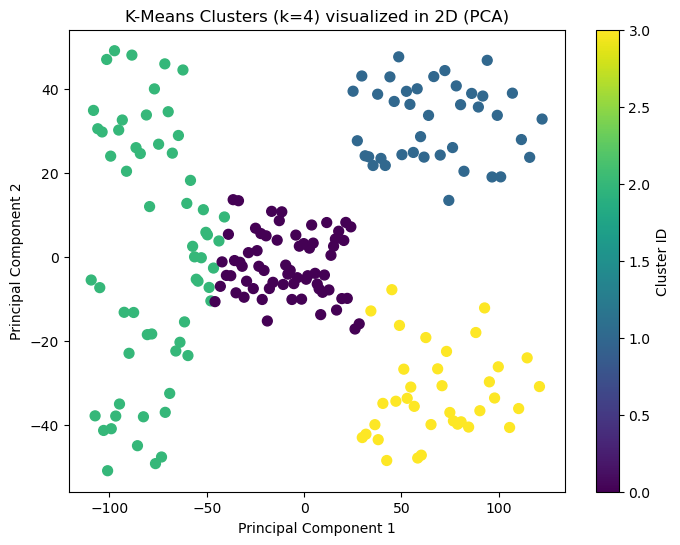

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Fit PCA to reduce data to 2 components
pca_2d = PCA(n_components=2)
principal_components=pca_2d.fit_transform(df) # X_scaled is your original data

# 2. Create a DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 3. Add the cluster labels obtained from K-Means (e.g., k=2)
pca_df['Cluster']=model.labels_

# 4. Plot the data
plt.figure(figsize=(8, 6))
# 'Cluster' column is used for coloring the points
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=50) 
plt.title('K-Means Clusters (k=4) visualized in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster ID')
plt.show()

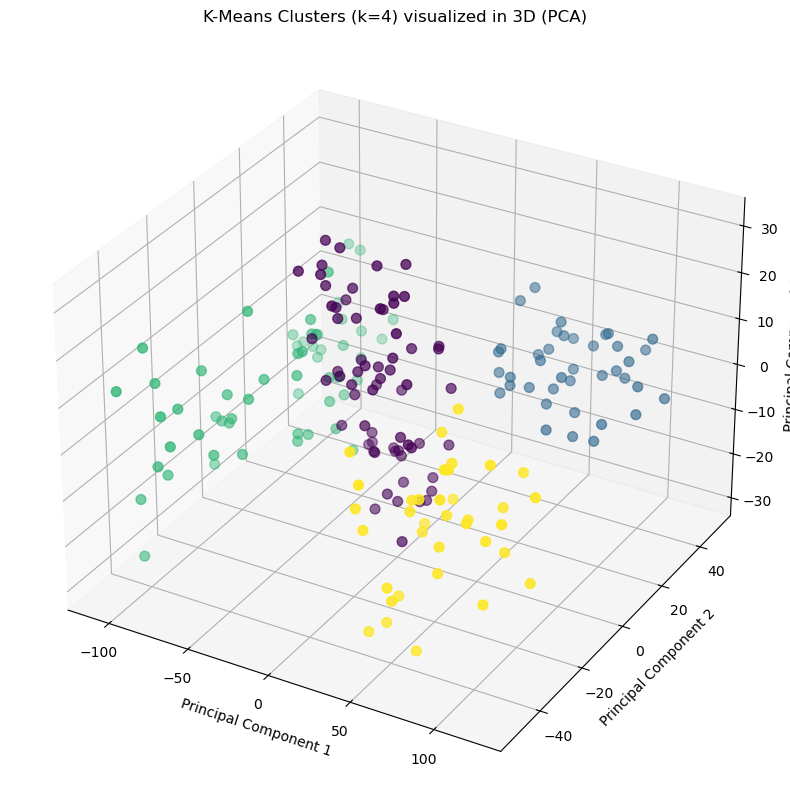

In [49]:
# 1. Fit PCA to reduce data to 3 components
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(df)

# 2. Create the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 3. Scatter plot using the first three principal components
ax.scatter(principal_components_3d[:, 0], 
           principal_components_3d[:, 1], 
           principal_components_3d[:, 2], 
           c=model.labels_, # Use the cluster labels for color
           cmap='viridis', 
           s=50)

ax.set_title('K-Means Clusters (k=4) visualized in 3D (PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [50]:
df2=df.copy()
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(df2, method='ward')

In [51]:
df2.drop('clusters',axis=1,inplace=True)

In [52]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


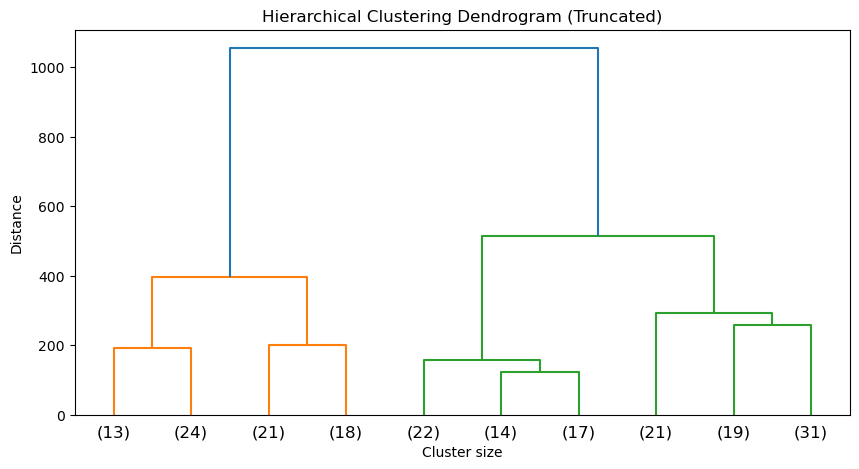

In [53]:
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()


In [64]:
# Choose number of clusters 
hier_labels = fcluster(Z, t=2, criterion='maxclust')
df2['Hier_Label'] = hier_labels

In [65]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'clusters'],
      dtype='object')

In [66]:
features=['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']
kmeans_summary = df.groupby('clusters')[features].mean()
hier_summary = df2.groupby('Hier_Label')[features].mean()


In [67]:
kmeans_summary 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,,,
0,92.484848,0.439394,43.878788,57.727273,49.257576
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,30.067797,0.372881,36.101695,29.864407,49.864407
3,164.000000,0.527778,40.805556,87.916667,17.888889


In [68]:
hier_summary 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Hier_Label,,,,,
1,162.460526,0.486842,36.407895,86.973684,51.000000
2,62.524194,0.411290,40.346774,44.370968,49.709677


In [69]:
combined = pd.concat(
    [kmeans_summary.mean().rename('KMeans_Avg'),hier_summary.mean().rename('Hierarchical_Avg')],axis=1)



In [70]:
combined

,KMeans_Avg,Hierarchical_Avg
CustomerID,112.138161,112.492360
Gender,0.450398,0.449066
Age,38.369587,38.377334
Annual Income (k$),65.511702,65.672326
Spending Score (1-100),49.784769,50.354839


In [71]:
diff = kmeans_summary.mean()-hier_summary.mean()


In [72]:
diff

CustomerID               -0.354199
Gender                    0.001332
Age                      -0.007748
Annual Income (k$)       -0.160624
Spending Score (1-100)   -0.570070
dtype: float64

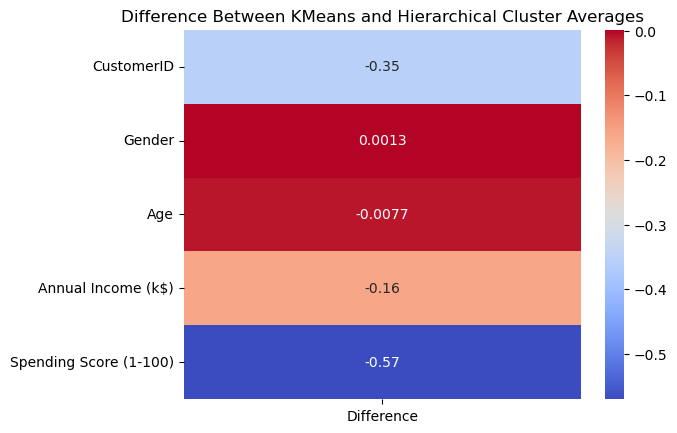

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pd.DataFrame({'Difference': diff}),annot=True,cmap='coolwarm')
plt.title('Difference Between KMeans and Hierarchical Cluster Averages')
plt.show()
